# prediction model for Churn_out_rate

In [1]:
#Emp_data -> Build a prediction model for Churn_out_rate 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
cor = pd.read_csv('emp_data.csv')

In [21]:
cor

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [22]:
cor.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [23]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
Salary_hike       10 non-null int64
Churn_out_rate    10 non-null int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [24]:
cor.shape

(10, 2)

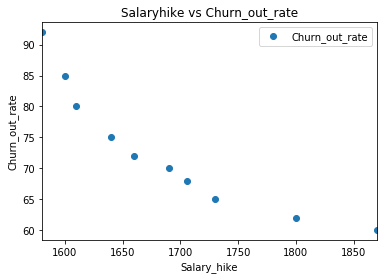

In [25]:
cor.plot(x='Salary_hike', y='Churn_out_rate', style='o') 
plt.title('Salaryhike vs Churn_out_rate')  
plt.xlabel('Salary_hike') 
plt.ylabel('Churn_out_rate')
plt.show()

In [46]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(cor['Salary_hike'], cor['Churn_out_rate'])
print('Pearsons correlation: %.3f' % corr)

from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(cor['Salary_hike'], cor['Churn_out_rate'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: -0.912
Spearmans correlation: -1.000


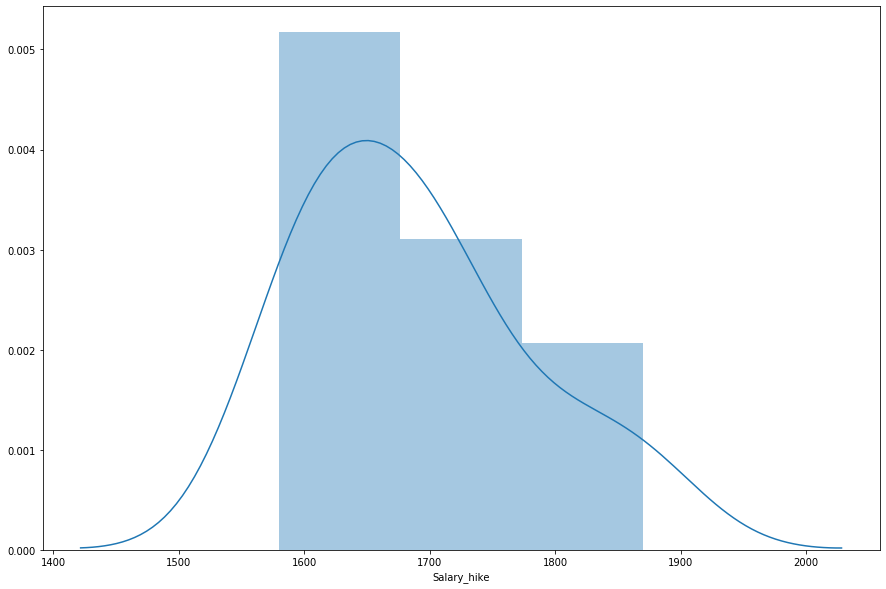

In [26]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(cor['Salary_hike'])

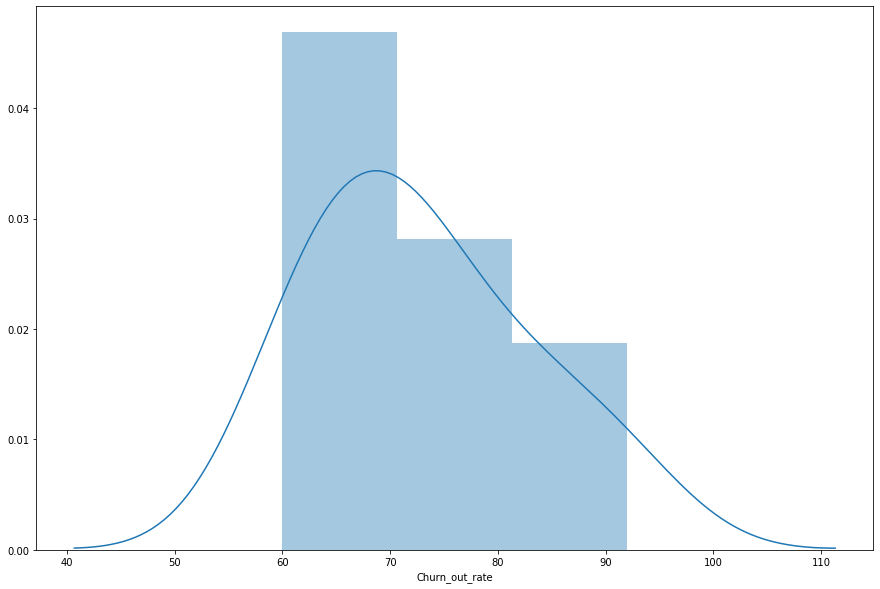

In [27]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(cor['Churn_out_rate'])

In [28]:
# Input dataset
X = cor['Salary_hike'].values.reshape(-1,1)
# Output or Predicted Value of data
y = cor['Churn_out_rate'].values.reshape(-1,1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =0)

In [30]:
predict_reg = LinearRegression()

In [31]:
# Train the Model using linear Regression
predict_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(" Intercept value of Model is " ,predict_reg.intercept_)
print("Coefficient value of Model is ", predict_reg.coef_)

 Intercept value of Model is  [247.7339362]
Coefficient value of Model is  [[-0.10350783]]


In [39]:
y_pred = predict_reg.predict(X_test)

In [40]:
df_p = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_p

,Actual,Predicted
0,80,81.086333
1,62,61.419846


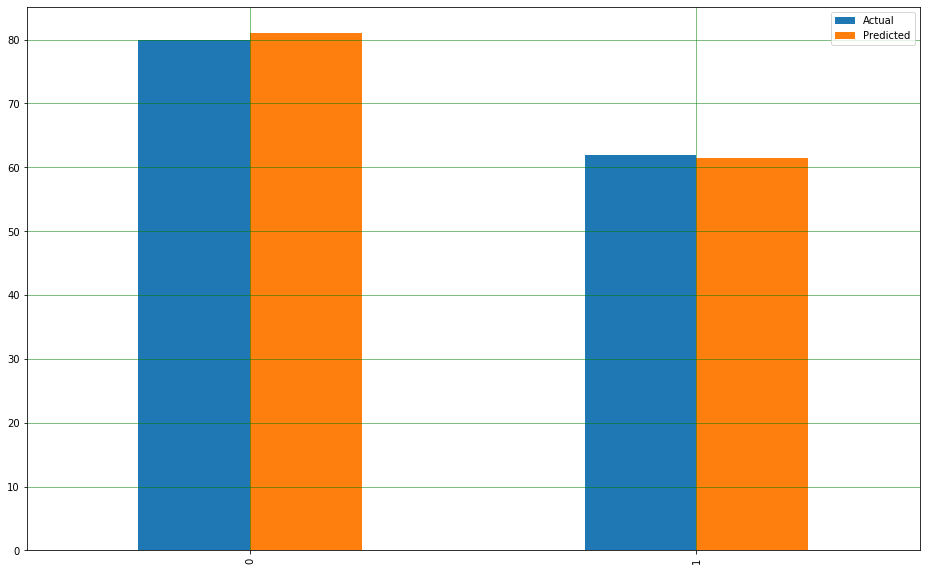

In [41]:
df1 = df_p.head(3)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

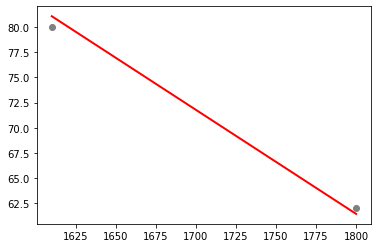

In [42]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8332436560558278
Mean Squared Error: 0.7583492989590029
Root Mean Squared Error: 0.8708325320973045
